# FAI Homework 8

**FBA Quant 이의형**

---

## Problem 1. NLP model

---

**(a)** Crawl the HTML document on the News page of Google site for TESLA.  

(https://www.google.com/search?q=TESLA&tbm=nws)

In [1]:
import time
from datetime import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup


def get_google_news_title(search_input, start_date, end_date, page_limit=10):
    url = f'https://www.google.com/search?q={search_input}&tbm=nws'
    
    trans_dt = lambda date: dt.strptime(start_date, '%Y-%m-%d').strftime('%d/%m/%Y')
    tbs = f'cdr:1,cd_min:{trans_dt(start_date)},cd_max:{trans_dt(end_date)}'
    
    total_raw_titles = []
    for page in range(page_limit):
        news_cnt = page * 10
        params = {'hl': 'en', 'tbs': tbs, 'start': news_cnt}
    
        html = requests.get(url=url, params=params).text  # Capturing Text Data
        soup = BeautifulSoup(html, 'lxml')
        raw_titles = soup.find_all('div', 'BNeawe vvjwJb AP7Wnd')
        
        total_raw_titles += raw_titles
        time.sleep(1)
    
    total_titles = [raw_title.get_text() for raw_title in total_raw_titles]  # Cleaning
    return total_titles

---

**(b)** Extract only news titles from the recent news section and process the text.

In [2]:
start_date = '2023-12-05'
end_date = '2023-12-06'

search_input = 'TESLA'

news_titles_tsla = get_google_news_title(search_input, start_date, end_date, page_limit=5)
news_titles_tsla

['Samsung Announces Collaboration With Tesla at CES 2024 for SmartThings Energy',
 'Samsung, Tesla to showcase platform collaboration at CES',
 'Tesla Recalls 1.6 Million Cars in China Due to Autopilot Crash Risk',
 'Tesla Cybertruck lands in the hands of Pharrell for early celebrity deliveries',
 "Tesla's first smart home partner is Samsung SmartThings",
 'In 8 States: Tesla Model Y For $32,000 & Model 3 For $30,000 — This Weekend Only!',
 "Charted: Tesla's Global Sales By Model and Year (2016–2023)",
 'Tesla Cybertruck Charging Curve Confirms the 4680-Cell Suspected Poor Charging Performance',
 'Ship carrying Tesla electric cars to Australia turned back to China',
 'Tesla recalls more than 1.6 million cars in China over steering software issues',
 'Tesla recalls 1.6 million electric vehicles in China',
 'Tesla Recalls 1.6 Million Cars in China to Make Autopilot Fixes',
 'Tesla recalls 1.6 million cars in China to reduce risk of collisions',
 'Tesla recalls 1.6m cars in China over Aut

In [3]:
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# (c)의 word2vec에 POS Tagging, Named Entity Recognition, Stemming, Lemmatization은 옵션
def process_title(title):
    title = title.lower()  # Normalization
    title = re.sub(r'\W', ' ', title)  # Cleaning
    words = word_tokenize(title)  # Tokenization
    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]  
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uhLee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uhLee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
processed_titles = [process_title(title) for title in news_titles_tsla]
processed_titles

[['samsung',
  'announces',
  'collaboration',
  'tesla',
  'ces',
  '2024',
  'smartthings',
  'energy'],
 ['samsung', 'tesla', 'showcase', 'platform', 'collaboration', 'ces'],
 ['tesla',
  'recalls',
  '1',
  '6',
  'million',
  'cars',
  'china',
  'due',
  'autopilot',
  'crash',
  'risk'],
 ['tesla',
  'cybertruck',
  'lands',
  'hands',
  'pharrell',
  'early',
  'celebrity',
  'deliveries'],
 ['tesla', 'first', 'smart', 'home', 'partner', 'samsung', 'smartthings'],
 ['8',
  'states',
  'tesla',
  'model',
  '32',
  '000',
  'model',
  '3',
  '30',
  '000',
  'weekend'],
 ['charted', 'tesla', 'global', 'sales', 'model', 'year', '2016', '2023'],
 ['tesla',
  'cybertruck',
  'charging',
  'curve',
  'confirms',
  '4680',
  'cell',
  'suspected',
  'poor',
  'charging',
  'performance'],
 ['ship',
  'carrying',
  'tesla',
  'electric',
  'cars',
  'australia',
  'turned',
  'back',
  'china'],
 ['tesla',
  'recalls',
  '1',
  '6',
  'million',
  'cars',
  'china',
  'steering',
  's

---

**(c)** Use word2vec to vectorize the text (dimension = 20) and dimensionally reduce the text vectorized using t-SNE (dimension = 2).

In [5]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

model = Word2Vec(sentences=processed_titles, vector_size=20, window=5, min_count=1, workers=4)
word_vec = [model.wv[word] for word in model.wv.index_to_key]
tsne = TSNE(n_components=2, random_state=33)
word_vec_2d = tsne.fit_transform(word_vec)
word_vec[0], word_vec_2d[0]

(array([-0.00449954,  0.0004494 ,  0.02704459,  0.04564249, -0.04744197,
        -0.03631723,  0.03210002,  0.04818165, -0.02610368, -0.01760506,
         0.04010923, -0.0073347 , -0.02247063,  0.03020938, -0.02273305,
        -0.00917115,  0.01679699,  0.00580254, -0.04232245, -0.05041274],
       dtype=float32),
 array([-3.3899415, -0.9962548], dtype=float32))

---

**(d)** Visualize dimensionally reduced results with plots.

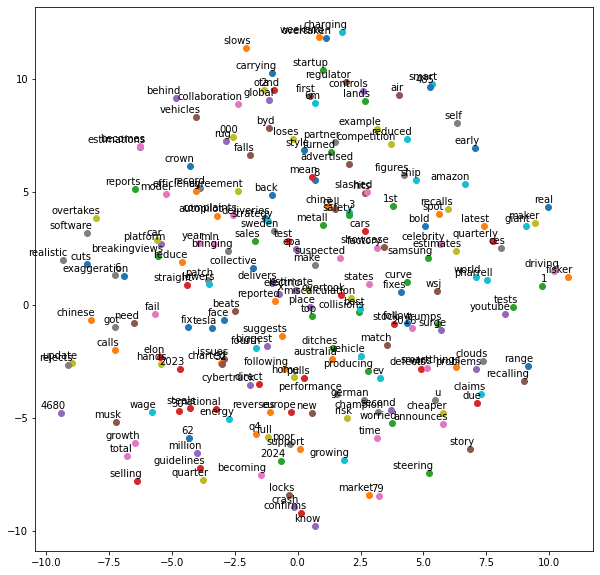

In [6]:
plt.figure(figsize=(10,10))
for i, word in enumerate(model.wv.index_to_key):
    plt.scatter(word_vec_2d[i, 0], word_vec_2d[i, 1])
    plt.annotate(word, xy=(word_vec_2d[i, 0], word_vec_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

---

**(e)** Make a sentiment score from 0 to 100 for TESLA and other firms (choose the number and which firm freely)

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def get_sentiment_score_by_news_title(news_titles):
    sia = SentimentIntensityAnalyzer()
    scores = []
    for title in news_titles:
        sentiment = sia.polarity_scores(title)
        if abs(sentiment['compound']) >= 0.1:
            score = (sentiment['compound'] + 1) / 2 * 100
            scores.append(score)
    return sum(scores) / len(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\uhLee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
# TESLA
score_tesla = get_sentiment_score_by_news_title(news_titles_tsla)
score_tesla

49.91021739130436

In [9]:
# NIKOLA
search_input = 'NKLA'
news_titles_nkla = get_google_news_title(search_input, start_date, end_date, page_limit=5)
news_titles_nkla

['Nikola Corporation Successful Launch: Nikola Produces 42, Wholesales 35 Hydrogen Fuel Cell Electric Trucks for ...',
 'Where Will Nikola Stock Be in 2024?',
 "'Share Price Will Take Care Of Itself,' Says Nikola CEO With 2024 Plan To Return Recalled BEVs, Hire New",
 '3 Obvious Stocks to Dump Before the End of 2023',
 'Nikola: Trevor Milton sentenced to prison after fraud conviction',
 'Let Nikola Stock Fall As Bankruptcy Chances Hit 81% Per MacroAxis',
 'E.V. Start-up Founder Could Get Prison Term in Fraud Case',
 'Nikola founder Trevor Milton sentenced to four years in prison for fraud',
 'Nikola founder Trevor Milton sentenced to 4 years in jail for fraudulent claims about electric vehicles',
 'Nikola founder sentenced to four years for lying about company’s electric cars',
 'SUCCESSFUL LAUNCH: NIKOLA PRODUCES 42, WHOLESALES 35 HYDROGEN FUEL CELL ELECTRIC TRUCKS ...',
 'Should You Buy EV Stock Nikola Corp (NKLA) Friday?',
 'Should You Invest in Nikola Stock Right Now?',
 'Nikola (N

In [10]:
# NIKOLA
score_nkla = get_sentiment_score_by_news_title(news_titles_nkla)
score_nkla

44.94661764705881

In [11]:
# FinWise Bancorp
search_input = 'FinWise Bancorp'
news_titles_finw = get_google_news_title(search_input, start_date, end_date, page_limit=5)
news_titles_finw

["FinWise Bancorp (FINW) is on the Move, Here's Why the Trend Could be Sustainable",
 'FinWise Bancorp Announces Additional Ownership Stake In Business Funding Group (BFG)',
 'FinWise Bank Partners with Stride Funding to Introduce Innovative Employer Sponsored Loan Program for Students',
 'FinWise Bancorp (NASDAQ:FINW) most popular amongst individual investors who own 44%, insiders hold 35%',
 'FinWise Acquires Additional Ownership Stake in Business Funding Group',
 'FinWise Bancorp Rings the Nasdaq Stock Market Closing Bell',
 'Best Momentum Stocks to Buy for November 17th',
 'FinWise Bancorp Promotes James Noone to President of FinWise Bank',
 'Second US-based bank shuttered by regulators',
 'After win, consumer advocates target another Utah bank over expensive loans',
 'Utah-based digital bank FinWise Bancorp revives $58 million IPO with new blank filing',
 'FinWise Bancorp: Risky Fintech-Heavy Partnership Model With Potential Upside (FINW)',
 'FinWise Bancorp (FINW) Q3 Earnings and

In [12]:
# FinWise Bancorp
score_finw = get_sentiment_score_by_news_title(news_titles_finw)
score_finw

71.48083333333334

In [13]:
print(f'TESLA: {score_tesla:.2f}')
print(f'NIKOLA: {score_nkla:.2f}')
print(f'FinWise Bancorp: {score_finw:.2f}')

TESLA: 49.91
NIKOLA: 44.95
FinWise Bancorp: 71.48


TSLA: 12월 7일 이후 3일 횡보  
NKLA: 12월 7일 이후 3일 하락  
FINW: 12월 7일 이후 3일 상승   

---

## Problem 2. Chat GPT for sentiment analysis

---

**(a)** Use Chat GPT API to evaluate the sentiment score of firms.

In [14]:
import json
import requests

import openai

with open('info_gpt.json', "r") as info:
    _config = json.load(info)
api_key = _config['GPT']['api_key']
openai.api_key = api_key

In [15]:
search_inputs = ['TESLA', 'Nikola', 'FinWise Bancorp']
news_titles = [news_titles_tsla, news_titles_nkla, news_titles_finw]

msg_order1 = "Please find sentimental score with a score between 0 and 100."
msg_order2 = "Just print out the numbers."

answers = []

finish_cnt = sum(list(map(len, news_titles)))
cnt = 0

for i in range(len(search_inputs)):
    company_name = search_inputs[i]
    titles = news_titles[i]
    for title in titles:
        cnt += 1
        print(f'{cnt} / {finish_cnt}')
        
        msg_info = f"'{title}' is a news title about {company_name}"
        msg = f"{msg_info} {msg_order1} {msg_order2}"
        print(f'Order: \n{msg}')
        
#         # Actual Execution
#         messages=[
#             {"role": "user", "content": f"{msg_info} {msg_order1} {msg_order2}"},
#         ]
#         completion = openai.ChatCompletion.create(
#             model="gpt-3.5-turbo",
#             messages=messages
#         )
#         answer = completion['choices'][0]['message']['content']
        
        # Example
        answer = 'I cannot provide a sentimental score for the specific news article you mentioned.'
        
        print(f'Answer: \n{answer}', end='\n'*2)
        answers.append(answer)

1 / 124
Order: 
'Samsung Announces Collaboration With Tesla at CES 2024 for SmartThings Energy' is a news title about TESLA Please find sentimental score with a score between 0 and 100. Just print out the numbers.
Answer: 
I cannot provide a sentimental score for the specific news article you mentioned.

2 / 124
Order: 
'Samsung, Tesla to showcase platform collaboration at CES' is a news title about TESLA Please find sentimental score with a score between 0 and 100. Just print out the numbers.
Answer: 
I cannot provide a sentimental score for the specific news article you mentioned.

3 / 124
Order: 
'Tesla Recalls 1.6 Million Cars in China Due to Autopilot Crash Risk' is a news title about TESLA Please find sentimental score with a score between 0 and 100. Just print out the numbers.
Answer: 
I cannot provide a sentimental score for the specific news article you mentioned.

4 / 124
Order: 
'Tesla Cybertruck lands in the hands of Pharrell for early celebrity deliveries' is a news title 

---

**(b)** Does the result correspond to the result from problem 1? Which one is more reliable?

GPT 3.5 turbo는 특정 텍스트에 대해 감성 분석을 할 수 없다고 한다. (아마 회사에 대한 의견을 내면 안 돼서?)  

하지만 GPT는 반어법이나 중의적 표현까지 잡아낼 수 있다고 알려져있다.  

따라서 만약 sentiment score를 매길 수 있다면 더 좋은 성과를 얻을 수 있을 것이다.

---